In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_APA_exp_scale.h5ad')
adata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [3]:
onegeneadata=adata[:,adata.var.index=='chr16_28591942_28592028*ENSG00000197165.11']
onegeneadata

View of AnnData object with n_obs × n_vars = 14537 × 1
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

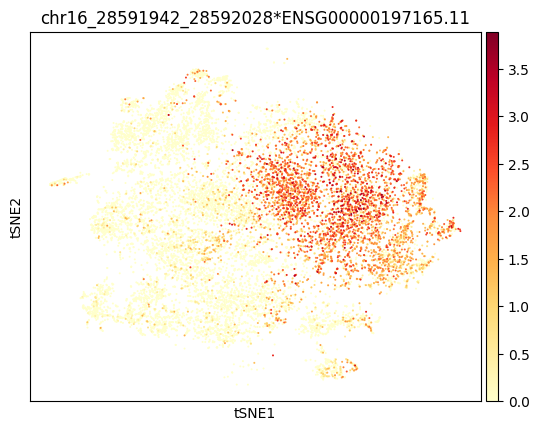

In [4]:
onegeneadata.var

sc.pl.tsne(onegeneadata,color='chr16_28591942_28592028*ENSG00000197165.11',cmap='YlOrRd')

In [5]:
adata.X

onegene=adata[:,adata.var.index=='chr16_28591942_28592028*ENSG00000197165.11']
onegene

View of AnnData object with n_obs × n_vars = 14537 × 1
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [6]:
expdf=pd.DataFrame(onegene.X.toarray(),index=onegene.obs.index,columns=onegene.var.index)
expdf

,chr16_28591942_28592028*ENSG00000197165.11
ACTTACTCAGATGGCA-SRR8513794,0.000000
CTCTACGGTTCCATGA-SRR8513794,2.647381
AAGGCAGTCTACTTAC-SRR8513794,1.943557
GGGACCTAGAAACGCC-SRR8513794,2.402636
AGCGTATTCAGGCGAA-SRR8513794,2.379909
...,...
TCAGGATGTACCGCTG-SRR8513799,0.000000
CGCTTCAGTCAAAGCG-SRR8513799,0.000000
AGAGCTTTCAGAGGTG-SRR8513799,0.000000
TCCACACAGCGATTCT-SRR8513799,0.000000


In [7]:
tsnedf=pd.DataFrame(onegene.obsm['X_tsne'],index=onegene.obs.index,columns=['tsne1','tsne2'])
tsnedf

,tsne1,tsne2
ACTTACTCAGATGGCA-SRR8513794,8.207750,16.197916
CTCTACGGTTCCATGA-SRR8513794,6.651749,13.968219
AAGGCAGTCTACTTAC-SRR8513794,14.186219,21.828816
GGGACCTAGAAACGCC-SRR8513794,5.497534,7.476529
AGCGTATTCAGGCGAA-SRR8513794,26.392096,9.929017
...,...,...
TCAGGATGTACCGCTG-SRR8513799,23.945322,-26.169327
CGCTTCAGTCAAAGCG-SRR8513799,2.414147,-8.671110
AGAGCTTTCAGAGGTG-SRR8513799,1.655674,-8.439816
TCCACACAGCGATTCT-SRR8513799,-9.993757,-15.499702


In [8]:
alldf=pd.concat([expdf,tsnedf],axis=1)
alldf

,chr16_28591942_28592028*ENSG00000197165.11,tsne1,tsne2
ACTTACTCAGATGGCA-SRR8513794,0.000000,8.207750,16.197916
CTCTACGGTTCCATGA-SRR8513794,2.647381,6.651749,13.968219
AAGGCAGTCTACTTAC-SRR8513794,1.943557,14.186219,21.828816
GGGACCTAGAAACGCC-SRR8513794,2.402636,5.497534,7.476529
AGCGTATTCAGGCGAA-SRR8513794,2.379909,26.392096,9.929017
...,...,...,...
TCAGGATGTACCGCTG-SRR8513799,0.000000,23.945322,-26.169327
CGCTTCAGTCAAAGCG-SRR8513799,0.000000,2.414147,-8.671110
AGAGCTTTCAGAGGTG-SRR8513799,0.000000,1.655674,-8.439816
TCCACACAGCGATTCT-SRR8513799,0.000000,-9.993757,-15.499702


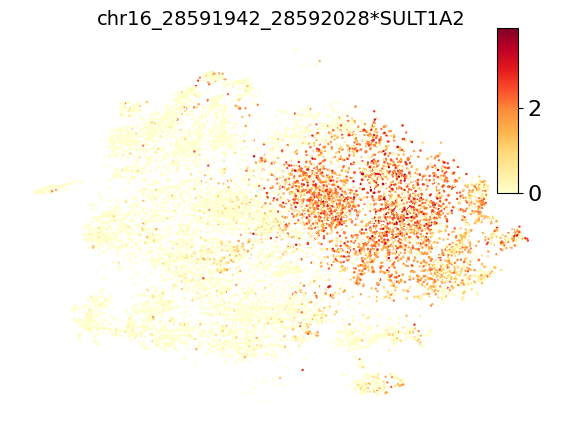

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

fig,ax=plt.subplots(figsize=(7,5))
sc=plt.scatter(alldf['tsne1'], alldf['tsne2'], c=alldf['chr16_28591942_28592028*ENSG00000197165.11'], cmap='YlOrRd',s=0.5)
position=fig.add_axes([0.82,0.56,0.03,0.33])
plt.colorbar(sc,cax=position)
#plt.set_cmap('RdBu_r')
#plt.colorbar(shrink=0.6,pad=0.01)
# ax.set_xlabel('tsne_1')
# ax.set_ylabel('tsne_2')
# plt.xticks("")
# plt.yticks("")
ax.set_title('chr16_28591942_28592028*SULT1A2',fontsize=14)
ax.set_xticks([])
ax.set_yticks([])


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



outputpath='/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/figure/Enterocyte_SULT1A2_PAS.pdf'
#fig.savefig(outputpath,dpi=300,bbox_inches='tight')
plt.show()

# REP15

In [10]:
import pandas as pd
import scanpy as sc

In [11]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_APA_exp_scale.h5ad')
adata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [12]:
onegeneadata=adata[:,adata.var.index=='chr12_27697550_27697592*ENSG00000174236.4']
onegeneadata

View of AnnData object with n_obs × n_vars = 14537 × 1
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [13]:
onegeneadata.var

,cluster_start,cluster_end,cluster_score,cluster_strand,gene_start,gene_end,gene_score,gene_strand,original_cluster_id,cluster_chr,gene_chr,gene_id,gene_name
chr12_27697550_27697592*ENSG00000174236.4,27697550,27697592,0,+,27696446,27697596,0,+,"chr12_+_27697550_27697590,chr12_+_27697551_276...",chr12,chr12,ENSG00000174236.4,REP15


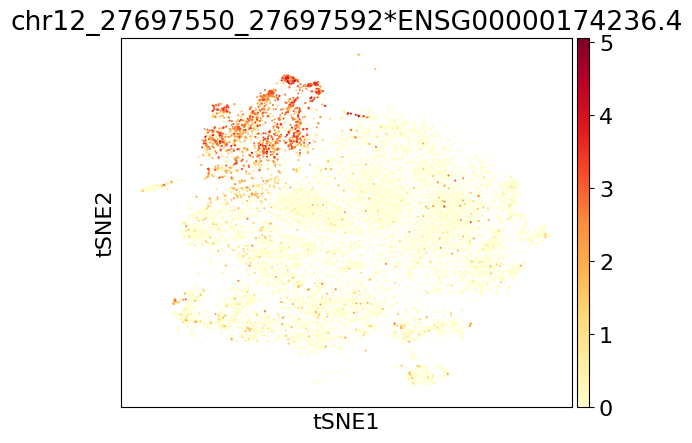

In [14]:
sc.pl.tsne(onegeneadata,color='chr12_27697550_27697592*ENSG00000174236.4',cmap='YlOrRd')

In [15]:
adata.X

<14537x14025 sparse matrix of type '<class 'numpy.float64'>'
	with 40400936 stored elements in Compressed Sparse Row format>

In [16]:
onegene=adata[:,adata.var.index=='chr12_27697550_27697592*ENSG00000174236.4']
onegene

View of AnnData object with n_obs × n_vars = 14537 × 1
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [17]:
expdf=pd.DataFrame(onegene.X.toarray(),index=onegene.obs.index,columns=onegene.var.index)
expdf

,chr12_27697550_27697592*ENSG00000174236.4
ACTTACTCAGATGGCA-SRR8513794,0.0
CTCTACGGTTCCATGA-SRR8513794,0.0
AAGGCAGTCTACTTAC-SRR8513794,0.0
GGGACCTAGAAACGCC-SRR8513794,0.0
AGCGTATTCAGGCGAA-SRR8513794,0.0
...,...
TCAGGATGTACCGCTG-SRR8513799,0.0
CGCTTCAGTCAAAGCG-SRR8513799,0.0
AGAGCTTTCAGAGGTG-SRR8513799,0.0
TCCACACAGCGATTCT-SRR8513799,0.0


In [18]:
tsnedf=pd.DataFrame(onegene.obsm['X_tsne'],index=onegene.obs.index,columns=['tsne1','tsne2'])
tsnedf

,tsne1,tsne2
ACTTACTCAGATGGCA-SRR8513794,8.207750,16.197916
CTCTACGGTTCCATGA-SRR8513794,6.651749,13.968219
AAGGCAGTCTACTTAC-SRR8513794,14.186219,21.828816
GGGACCTAGAAACGCC-SRR8513794,5.497534,7.476529
AGCGTATTCAGGCGAA-SRR8513794,26.392096,9.929017
...,...,...
TCAGGATGTACCGCTG-SRR8513799,23.945322,-26.169327
CGCTTCAGTCAAAGCG-SRR8513799,2.414147,-8.671110
AGAGCTTTCAGAGGTG-SRR8513799,1.655674,-8.439816
TCCACACAGCGATTCT-SRR8513799,-9.993757,-15.499702


In [19]:
alldf=pd.concat([expdf,tsnedf],axis=1)
alldf

,chr12_27697550_27697592*ENSG00000174236.4,tsne1,tsne2
ACTTACTCAGATGGCA-SRR8513794,0.0,8.207750,16.197916
CTCTACGGTTCCATGA-SRR8513794,0.0,6.651749,13.968219
AAGGCAGTCTACTTAC-SRR8513794,0.0,14.186219,21.828816
GGGACCTAGAAACGCC-SRR8513794,0.0,5.497534,7.476529
AGCGTATTCAGGCGAA-SRR8513794,0.0,26.392096,9.929017
...,...,...,...
TCAGGATGTACCGCTG-SRR8513799,0.0,23.945322,-26.169327
CGCTTCAGTCAAAGCG-SRR8513799,0.0,2.414147,-8.671110
AGAGCTTTCAGAGGTG-SRR8513799,0.0,1.655674,-8.439816
TCCACACAGCGATTCT-SRR8513799,0.0,-9.993757,-15.499702


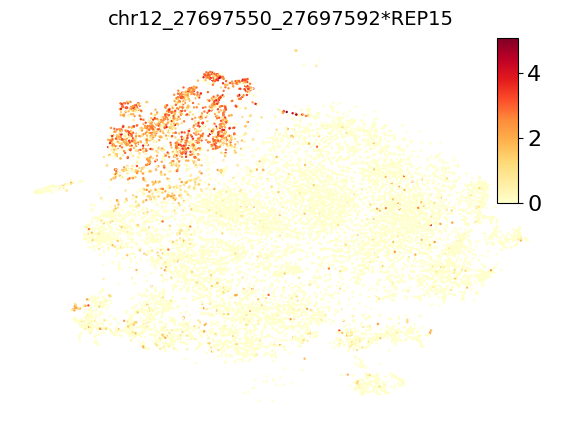

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

fig,ax=plt.subplots(figsize=(7,5))
sc=plt.scatter(alldf['tsne1'], alldf['tsne2'], c=alldf['chr12_27697550_27697592*ENSG00000174236.4'], cmap='YlOrRd',s=0.5)
position=fig.add_axes([0.82,0.54,0.03,0.33])
plt.colorbar(sc,cax=position)
#plt.set_cmap('RdBu_r')
#plt.colorbar(shrink=0.6,pad=0.01)
# ax.set_xlabel('tsne_1')
# ax.set_ylabel('tsne_2')
# plt.xticks("")
# plt.yticks("")
ax.set_title('chr12_27697550_27697592*REP15',fontsize=14)
ax.set_xticks([])
ax.set_yticks([])


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



outputpath='/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/figure/Goblet_REP15_PAS.pdf'
#fig.savefig(outputpath,dpi=300,bbox_inches='tight')
plt.show()